In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
dataset1 = np.array([
    ("Bayer Leverkusen", 54.99, 23.55, 51.98),
    ("Bayern Munich", 66.91, 23.48, 56.23),
    ("VfB Stuttgart", 57.07, 29.07, 50.23),
    ("Borussia Dortmund", 51.40, 37.98, 41.48),
    ("RasenBallsport Leipzig", 48.19, 30.20, 44.08),
    ("Eintracht Frankfurt", 34.36, 38.66, 31.42),
    ("Hoffenheim", 39.94, 44.82, 30.47),
    ("Werder Bremen", 31.60, 40.56, 27.89),
    ("Freiburg", 38.08, 43.00, 30.76),
    ("Augsburg", 37.29, 42.59, 30.26),
    ("FC Heidenheim", 29.95, 49.32, 22.39),
    ("Borussia M.Gladbach", 37.20, 45.16, 29.37),
    ("Wolfsburg", 31.18, 36.63, 30.27),
    ("Union Berlin", 31.95, 39.67, 28.09),
    ("Bochum", 35.88, 50.35, 26.85),
    ("FC Cologne", 27.76, 51.99, 20.27),
    ("Mainz 05", 29.80, 31.67, 31.50),
    ("Darmstadt", 26.92, 51.77, 20.23)
], dtype=[('team', 'U32'), ('xg', 'float64'), ('xga', 'float64'), ('xpoints', 'float64')])


In [36]:
dataset2 = np.array([
    ("Bayer Leverkusen", 61, 16, 64),
    ("Bayern Munich", 65, 28, 54),
    ("VfB Stuttgart", 55,31,50),
    ("Borussia Dortmund", 48,30,44),
    ("RasenBallsport Leipzig", 53,31,43),
    ("Eintracht Frankfurt", 38,31,37),
    ("Hoffenheim", 43,44,33),
    ("Werder Bremen", 33,37,30),
    ("Freiburg", 32,44,30),
    ("Augsburg", 39,41,29),
    ("FC Heidenheim", 34,42,28),
    ("Borussia M.Gladbach", 42,46,26),
    ("Wolfsburg", 30,39,25),
    ("Union Berlin", 23,39,25),
    ("Bochum", 29,50,25),
    ("FC Cologne", 16,39,17),
    ("Mainz 05", 19,38,16),
    ("Darmstadt", 24,58,13)
], dtype=[('team', 'U32'), ('xg', 'float64'), ('xga', 'float64'), ('xpoints', 'float64')])


In [37]:
team = dataset1['team']
xg = dataset1['xg']
xga = dataset1['xga']
xpoints = dataset1['xpoints']
polyfit = np.polyfit(xg, xga, 1)
polyval = np.polyval(polyfit, xg)

In [38]:
team2 = dataset2['team']
xg2 = dataset2['xg']
xga2 = dataset2['xga']
xpoints2 = dataset2['xpoints']
polyfit2 = np.polyfit(xg2, xga2, 1)
polyval2 = np.polyval(polyfit2, xg2)

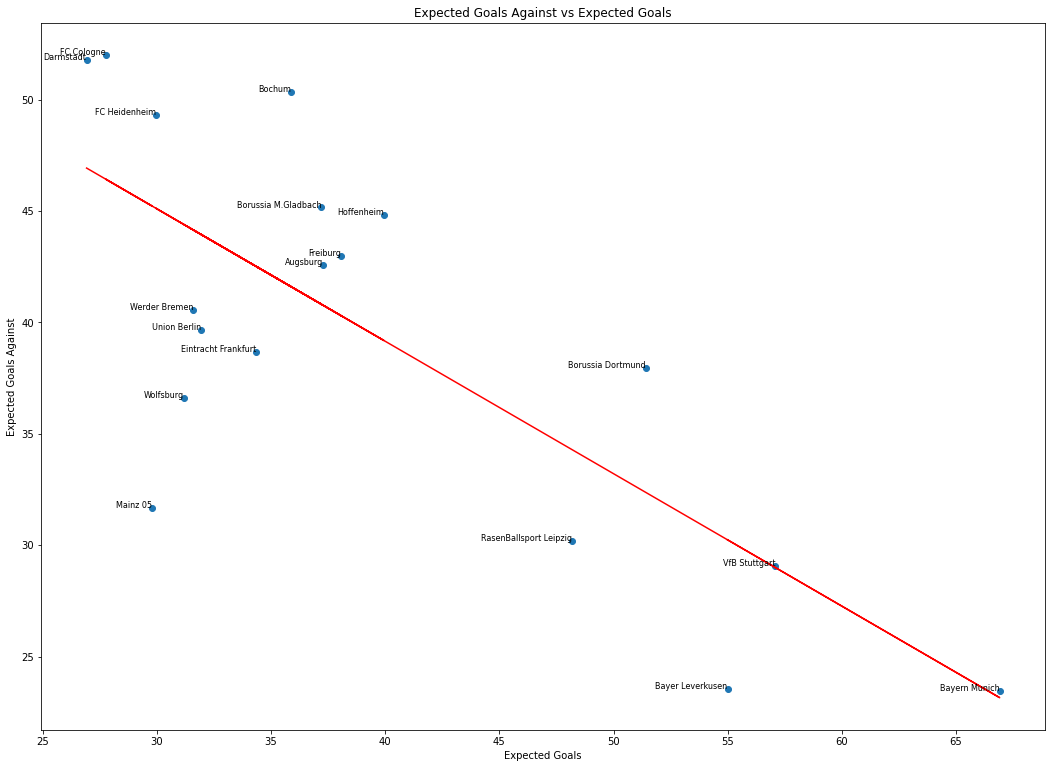

In [39]:
plt.figure(figsize=(18, 13))
plt.scatter(xg, xga)
plt.plot(xg, polyval, color='red')
plt.xlabel('Expected Goals')
plt.ylabel('Expected Goals Against')
plt.title('Expected Goals Against vs Expected Goals')
for i, team in enumerate(team):
    plt.text(xg[i], xga[i], team, fontsize=8, ha='right')
plt.show()

- Bayern Munich has the best stats both for Expected Goals and Expected Goals against. They were expected to score <span style = "color:blue">67</span> goals and conceded <span style = "color:blue">24</span> goals so far.
- Bayer Leverkusen were expected to score <span style = "color:blue">55</span> goals and conceded the same amount number of goals with Bayern Munich.

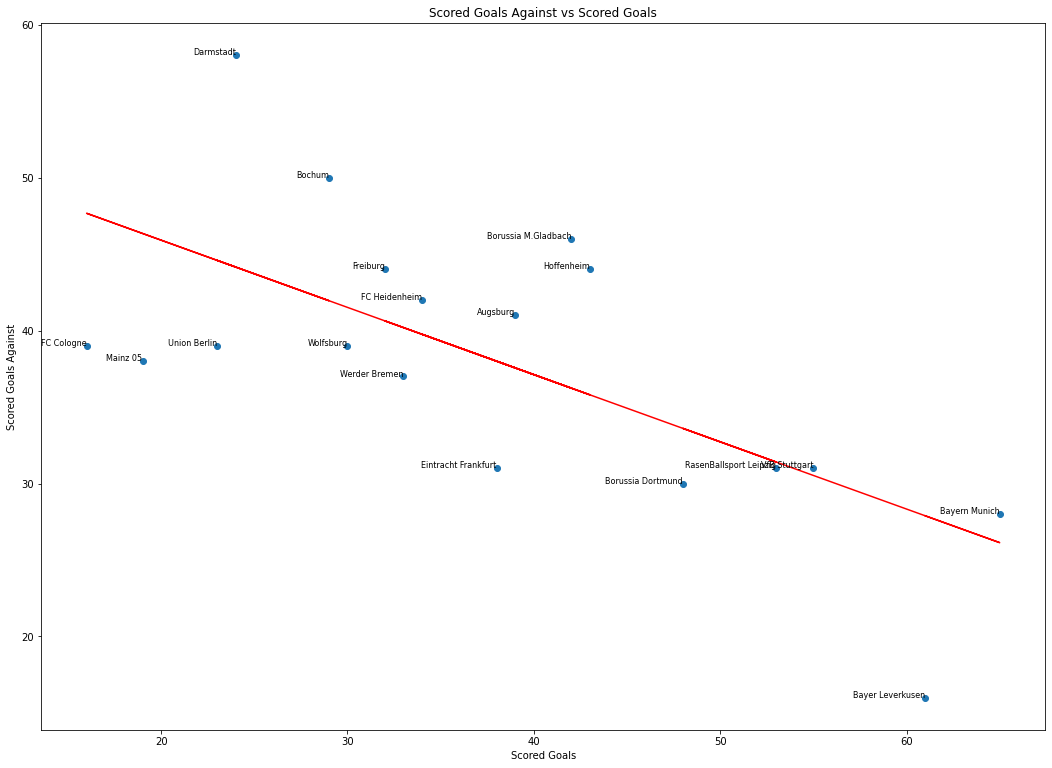

In [40]:
plt.figure(figsize=(18, 13))
plt.scatter(xg2, xga2)
plt.plot(xg2, polyval2, color='red')
plt.xlabel('Scored Goals')
plt.ylabel('Scored Goals Against')
plt.title('Scored Goals Against vs Scored Goals')
for i, team in enumerate(team2):
    plt.text(xg2[i], xga2[i], team, fontsize=8, ha='right')
plt.show()

- Let's analyze the reality.
- Bayern Munich has scored 65 goals, close to expectations, and conceded <span style="color:blue">28</span> goals, <span style="color:blue">5</span> more than expected.
- Bayer Leverkusen has scored <span style = "color:blue">61</span> goals, <span style = "color:blue">6</span> more than expected, and conceded <span style = "color:blue">16</span> goals, <span style = "color:blue">8</span> less than expected.
- Bayer Leverkusen scores goals with a higher percentage than Bayern Munich. However, Bayern Munich has scored <span style = "color:blue">4</span> more than the opponent, which is obviously not the reason of <span style = "color:red">10</span> points difference. 
- Hence, the problem probably occurs from the conceding goal part of the stats.


In [41]:
for i in range(len(dataset1['team'])):
    if dataset1['team'][i] == 'Bayer Leverkusen':
        print(i)
# I have written this code just for a reminder to find the index of the name of the club.


0


In [42]:
c = []
for i in range(len(dataset2)):
    for j in range(len(dataset1)):
        if dataset2[i][0] == dataset1[j][0]:
            difference = float(dataset2[i][1]) - float(dataset1[j][1])
            c.append(difference)
diff_sco_minus_expgoals = c

In [43]:
d = []
for i in range(len(dataset2)):
    for j in range(len(dataset1)):
        if dataset2[i][0] == dataset1[j][0]:
            difference = float(dataset2[i][2]) - float(dataset1[j][2])
            d.append(difference)
diff_sco_minus_expgoals_ag = d

In [44]:
dataset3 = np.array([
    ("Bayer Leverkusen", 54.99, 23.55, 51.98),
    ("Bayern Munich", 66.91, 23.48, 56.23),
    ("VfB Stuttgart", 57.07, 29.07, 50.23),
    ("Borussia Dortmund", 51.40, 37.98, 41.48),
    ("RasenBallsport Leipzig", 48.19, 30.20, 44.08),
    ("Eintracht Frankfurt", 34.36, 38.66, 31.42),
    ("Hoffenheim", 39.94, 44.82, 30.47),
    ("Werder Bremen", 31.60, 40.56, 27.89),
    ("Freiburg", 38.08, 43.00, 30.76),
    ("Augsburg", 37.29, 42.59, 30.26),
    ("FC Heidenheim", 29.95, 49.32, 22.39),
    ("Borussia M.Gladbach", 37.20, 45.16, 29.37),
    ("Wolfsburg", 31.18, 36.63, 30.27),
    ("Union Berlin", 31.95, 39.67, 28.09),
    ("Bochum", 35.88, 50.35, 26.85),
    ("FC Cologne", 27.76, 51.99, 20.27),
    ("Mainz 05", 29.80, 31.67, 31.50),
    ("Darmstadt", 26.92, 51.77, 20.23)
], dtype=[('team', 'U32'), ('xg', 'float64'), ('xga', 'float64'), ('xpoints', 'float64')])
dataset3
        

array([('Bayer Leverkusen', 54.99, 23.55, 51.98),
       ('Bayern Munich', 66.91, 23.48, 56.23),
       ('VfB Stuttgart', 57.07, 29.07, 50.23),
       ('Borussia Dortmund', 51.4 , 37.98, 41.48),
       ('RasenBallsport Leipzig', 48.19, 30.2 , 44.08),
       ('Eintracht Frankfurt', 34.36, 38.66, 31.42),
       ('Hoffenheim', 39.94, 44.82, 30.47),
       ('Werder Bremen', 31.6 , 40.56, 27.89),
       ('Freiburg', 38.08, 43.  , 30.76),
       ('Augsburg', 37.29, 42.59, 30.26),
       ('FC Heidenheim', 29.95, 49.32, 22.39),
       ('Borussia M.Gladbach', 37.2 , 45.16, 29.37),
       ('Wolfsburg', 31.18, 36.63, 30.27),
       ('Union Berlin', 31.95, 39.67, 28.09),
       ('Bochum', 35.88, 50.35, 26.85),
       ('FC Cologne', 27.76, 51.99, 20.27),
       ('Mainz 05', 29.8 , 31.67, 31.5 ),
       ('Darmstadt', 26.92, 51.77, 20.23)],
      dtype=[('team', '<U32'), ('xg', '<f8'), ('xga', '<f8'), ('xpoints', '<f8')])

In [45]:
for i in range(len(diff_sco_minus_expgoals)):
    dataset3[i][1] = diff_sco_minus_expgoals[i]
for j in range(len(diff_sco_minus_expgoals_ag)):
    dataset3[j][2] = diff_sco_minus_expgoals_ag[j]
dataset3

array([('Bayer Leverkusen',   6.01,  -7.55, 51.98),
       ('Bayern Munich',  -1.91,   4.52, 56.23),
       ('VfB Stuttgart',  -2.07,   1.93, 50.23),
       ('Borussia Dortmund',  -3.4 ,  -7.98, 41.48),
       ('RasenBallsport Leipzig',   4.81,   0.8 , 44.08),
       ('Eintracht Frankfurt',   3.64,  -7.66, 31.42),
       ('Hoffenheim',   3.06,  -0.82, 30.47),
       ('Werder Bremen',   1.4 ,  -3.56, 27.89),
       ('Freiburg',  -6.08,   1.  , 30.76),
       ('Augsburg',   1.71,  -1.59, 30.26),
       ('FC Heidenheim',   4.05,  -7.32, 22.39),
       ('Borussia M.Gladbach',   4.8 ,   0.84, 29.37),
       ('Wolfsburg',  -1.18,   2.37, 30.27),
       ('Union Berlin',  -8.95,  -0.67, 28.09),
       ('Bochum',  -6.88,  -0.35, 26.85),
       ('FC Cologne', -11.76, -12.99, 20.27),
       ('Mainz 05', -10.8 ,   6.33, 31.5 ),
       ('Darmstadt',  -2.92,   6.23, 20.23)],
      dtype=[('team', '<U32'), ('xg', '<f8'), ('xga', '<f8'), ('xpoints', '<f8')])

In [46]:
dataset3

array([('Bayer Leverkusen',   6.01,  -7.55, 51.98),
       ('Bayern Munich',  -1.91,   4.52, 56.23),
       ('VfB Stuttgart',  -2.07,   1.93, 50.23),
       ('Borussia Dortmund',  -3.4 ,  -7.98, 41.48),
       ('RasenBallsport Leipzig',   4.81,   0.8 , 44.08),
       ('Eintracht Frankfurt',   3.64,  -7.66, 31.42),
       ('Hoffenheim',   3.06,  -0.82, 30.47),
       ('Werder Bremen',   1.4 ,  -3.56, 27.89),
       ('Freiburg',  -6.08,   1.  , 30.76),
       ('Augsburg',   1.71,  -1.59, 30.26),
       ('FC Heidenheim',   4.05,  -7.32, 22.39),
       ('Borussia M.Gladbach',   4.8 ,   0.84, 29.37),
       ('Wolfsburg',  -1.18,   2.37, 30.27),
       ('Union Berlin',  -8.95,  -0.67, 28.09),
       ('Bochum',  -6.88,  -0.35, 26.85),
       ('FC Cologne', -11.76, -12.99, 20.27),
       ('Mainz 05', -10.8 ,   6.33, 31.5 ),
       ('Darmstadt',  -2.92,   6.23, 20.23)],
      dtype=[('team', '<U32'), ('xg', '<f8'), ('xga', '<f8'), ('xpoints', '<f8')])

In [47]:
team3 = dataset3['team']
xg3 = dataset3['xg']
xga3 = dataset3['xga']
xpoints3 = dataset3['xpoints']
polyfit3 = np.polyfit(xg3, xga3, 1)
polyval3 = np.polyval(polyfit, xg3)

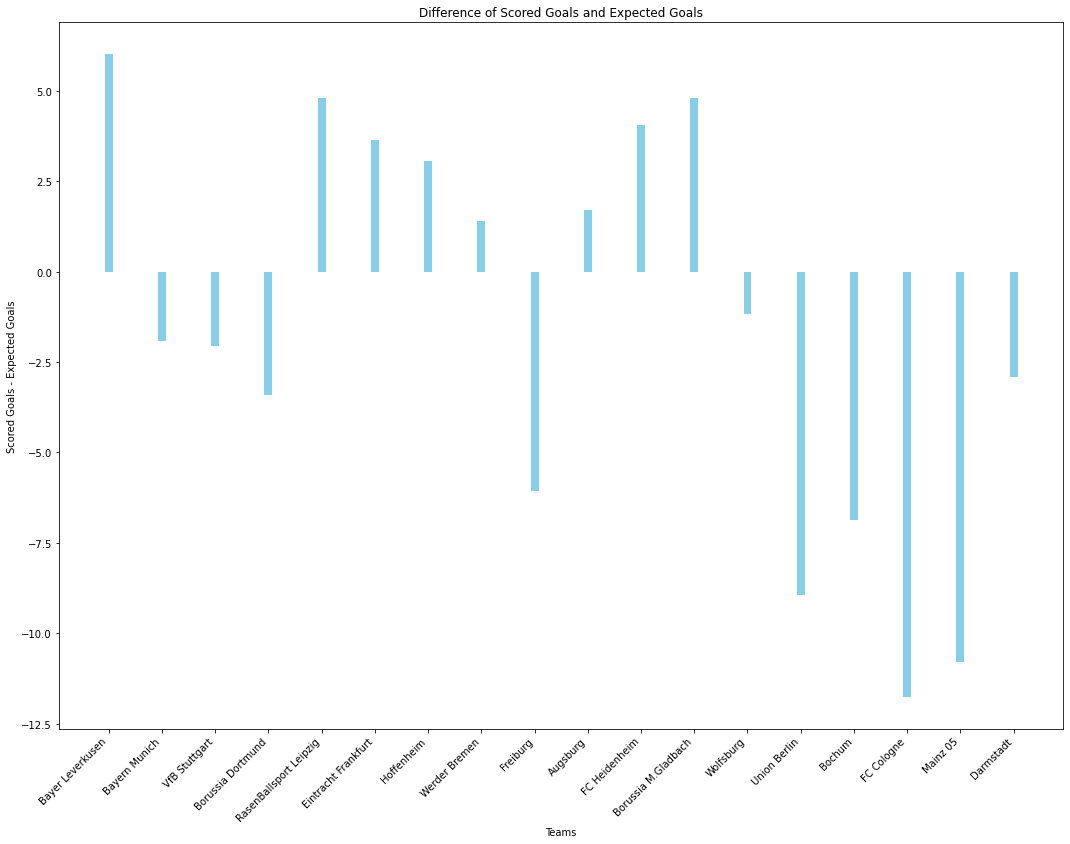

In [48]:
plt.figure(figsize=(18, 13))
plt.bar(team3, xg3, color='skyblue', width=0.15)
plt.xlabel('Teams')
plt.ylabel('Scored Goals - Expected Goals')
plt.title('Difference of Scored Goals and Expected Goals')
plt.xticks(rotation=45, ha='right')
plt.show()

- Bayer Leverkusen has scored with higher percentage. On the other hand, Bayern Munich has scored with lower percentage compared to expectations.

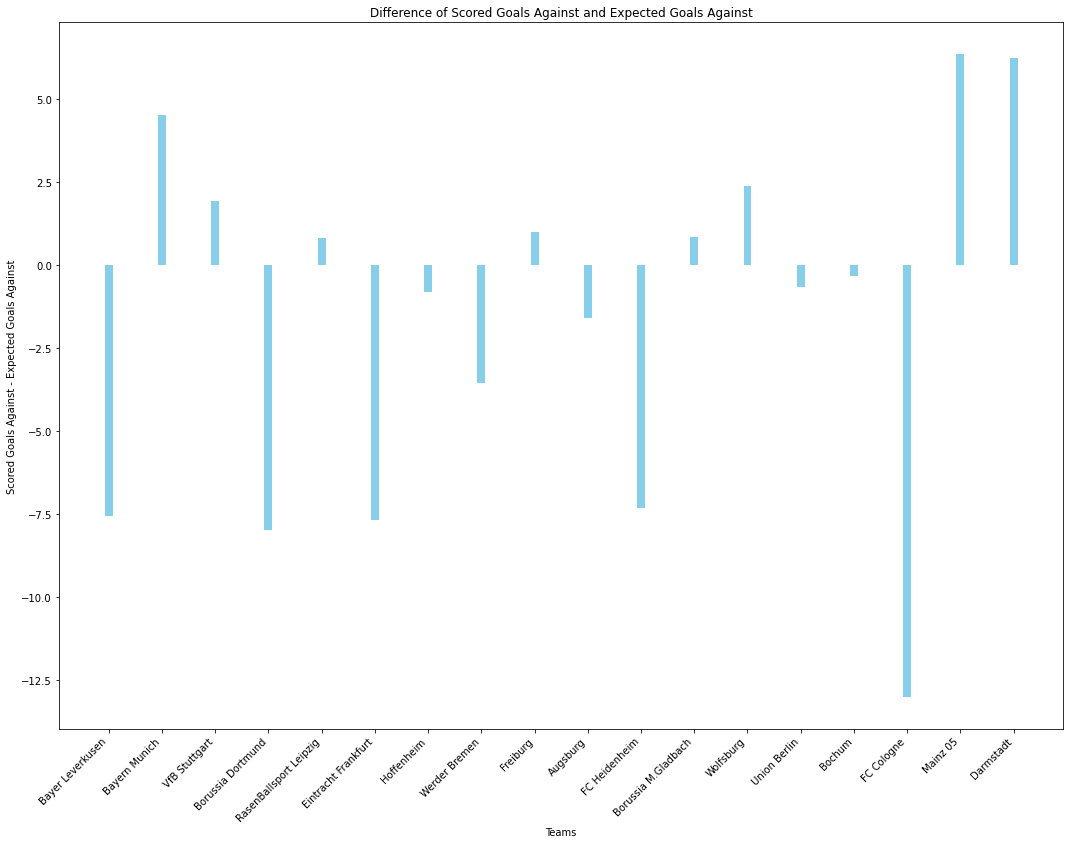

In [49]:
plt.figure(figsize=(18, 13))
plt.bar(team3, xga3, color='skyblue', width=0.15)
plt.xlabel('Teams')
plt.ylabel('Scored Goals Against - Expected Goals Against')
plt.title('Difference of Scored Goals Against and Expected Goals Against')
plt.xticks(rotation=45, ha='right')
plt.show()

- Bayer Leverkusen has conceded less goals compared to Bayern Munich, compared to expectations.
- The stats say tells that the difference of <span style = "color:blue">10</span> points might occur from the performances of the goalkeepers. 
- Let's analyze the goalkeepers performances.

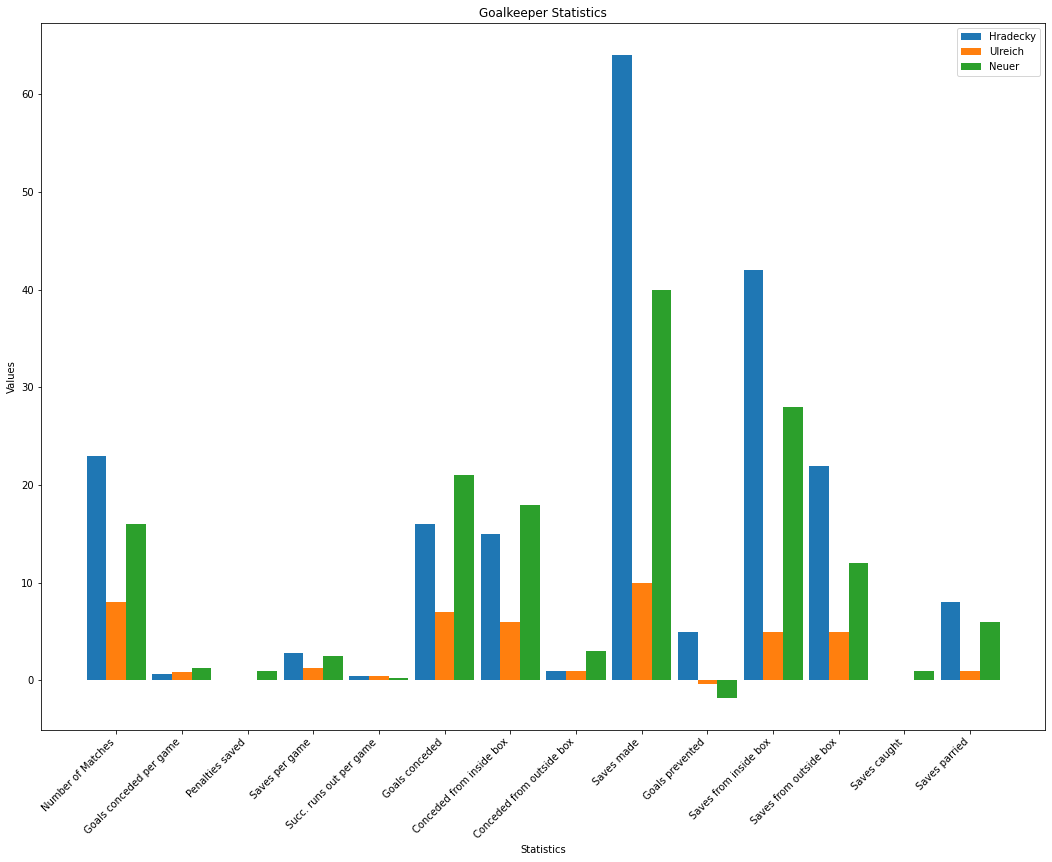

In [50]:
players = ['Hradecky', 'Ulreich', 'Neuer']
statistics = ['Number of Matches','Goals conceded per game', 'Penalties saved', 'Saves per game', 
              'Succ. runs out per game', 'Goals conceded', 'Conceded from inside box', 
              'Conceded from outside box', 'Saves made', 'Goals prevented', 
              'Saves from inside box', 'Saves from outside box', 'Saves caught', 
              'Saves parried']

hradecky_values = [23, 0.7, 0, 2.8, 0.5, 16, 15, 1, 64, 5.01, 42, 22, 0, 8]
ulreich_values = [8, 0.9, 0, 1.3, 0.5, 7, 6, 1, 10, -0.36, 5, 5, 0, 1]
neuer_values = [16, 1.3, 1, 2.5, 0.3, 21, 18, 3, 40, -1.77, 28, 12, 1, 6]

x = range(len(statistics))
bar_width = 0.3

plt.figure(figsize=(18, 13))
plt.bar(x, hradecky_values, width=bar_width, label='Hradecky')
plt.bar([i + bar_width for i in x], ulreich_values, width=bar_width, label='Ulreich')
plt.bar([i + 2 * bar_width for i in x], neuer_values, width=bar_width, label='Neuer')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Goalkeeper Statistics')
plt.xticks([i + bar_width for i in x], statistics, rotation=45, ha='right')
plt.legend()
plt.show()

- The critical statistics is "Goals Prevented" that calculates the quality of goalkeeper's shot-stopping performance by subtracting the number of goals a GK has conceded from the number of goals a GK would be expected to concede based on the quality of the shots they faced (xGOT faced).
- Hradecky prevented <span style = "color:blue">5</span> goals through the season. On the other side, Ulreich and Neuer follows Hradecky by <span style = "color:blue">-0.36</span> and <span style = "color:blue">-1.77</span>, respectively.
- The other important data is "Saves per game", probably the most important one. 
- Hradecky saves 2.8 shots with 80%. On the other hand, Ulreich saves 1.3 shots with 59% and Neuer saves 2.5 with 66%. It can be said that Neuer stats are close to Hradecky in the field of Saves per game, however, the percentage is low. The reason might be the falling momentum of the whole Bayern Munich players due to the chaos they have faced for a month and a half. It is also known that Neuer played most of the matches during these chaotic period. That's why the percentage is low.
- Since making comment about the all season, which Neuer has not played all of the matches in this season, is not a healthy way to analyze the performances, it is needed to analyze all matches one by one. However, it is too hard to do. So let's analyze the matches played in this month between Bayer Leverkusen and Bayern Munich, or roughly saying, Hradecky vs. Neuer.

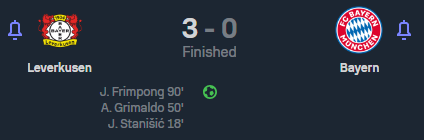

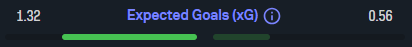

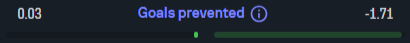

- First of all, I admit that Bayern Munich played so poorly in this matches if they compared with Bayer Leverkusen.
- The most important information from the above screenshots is "Goals prevented", which measures the goalkeeper's effectiveness in preventing goals. It's calculated by comparing the actual number of goals conceded to the expected number based on the quality of shots faced. <span style = "color:red">A negative score indicates the goalkeeper has conceded more goals than expected.</span>
- The difference in "Goals prevented" can be seen clearly, which is dramatic scenario, especially for the most important match of the season. However, just blaming or praise the goalkeeper is not a healthy way to analyze. 
- It is clear that the difference that Xabi Alonso has created is the most influential part of this miraculous story of Leverkusen.
- The dominant performance of Leverkusen is the reason of determining the performance of the goalkeeper, who is Hradecky. As a response, Hradecky has played very well, as has the whole team so far. 
- On the other hand, clearly the stats of Bayern Munich is obviously better than Leverkusen, of course in a statistics world. In reality, the whole Bayern Munich players and the technical staff (also board of management) has not satisfied the statistics so far.  

- As a summary, all Bayer Leverkusen members has worked up to the nines so far in which they deserve to be the champion.
- On the other side, Bayern Munich should create the next year team by starting to plan it immediately.